In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
sys.path.insert(0,'..')
from notebookFunctions import *
# from .. import notebookFunctions

%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

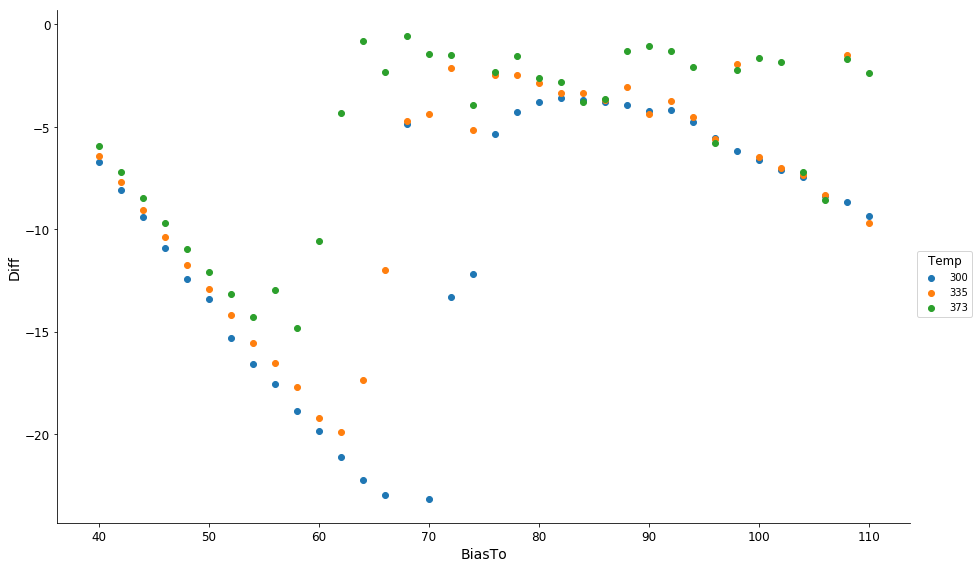

In [8]:
data = pd.read_feather("/Users/weilu/Research/server/may_2018/second_start_topology/rerun_5_14_May_143016.feather")
dic = {"T0":300, "T1":335, "T2":373, "T3":417, "T4":465, "T5":519, "T6":579, "T7":645, "T8":720, "T9":803, "T10":896, "T11":1000}
a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
rerun5 = data
t = a.query("Temp < 400").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

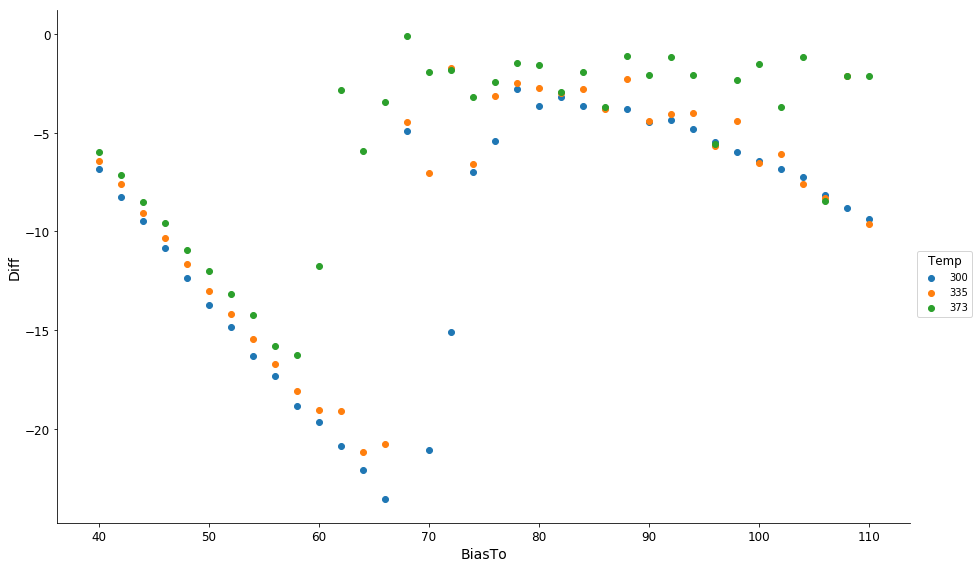

In [5]:
data = pd.read_feather("/Users/weilu/Research/server/may_2018/second_start_topology/rerun_3_14_May_000912.feather")
dic = {"T0":300, "T1":335, "T2":373, "T3":417, "T4":465, "T5":519, "T6":579, "T7":645, "T8":720, "T9":803, "T10":896, "T11":1000}
a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
rerun3 = data
t = a.query("Temp < 400").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

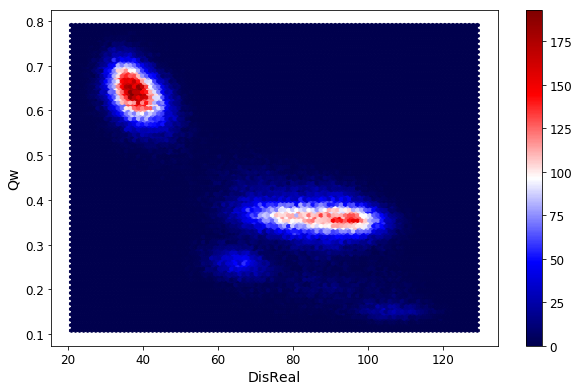

In [6]:
rerun3.query("Temp == 335").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

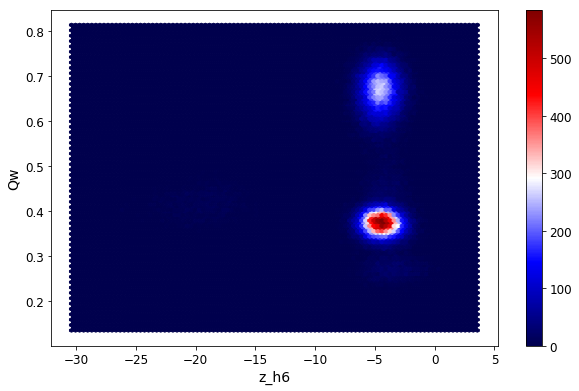

In [21]:
rerun5.query("Temp == 300").plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

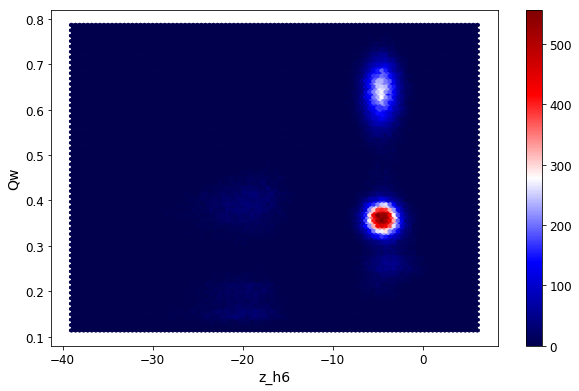

In [15]:
rerun5.query("Temp == 335").plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

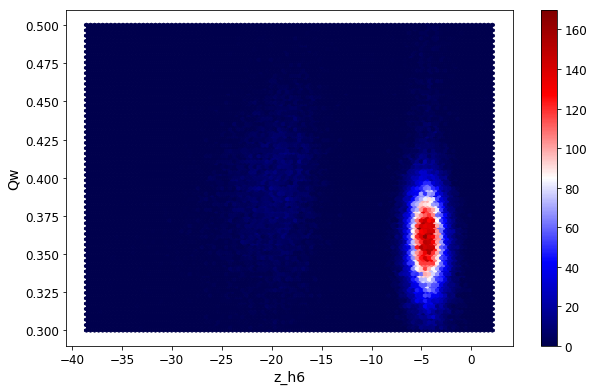

In [26]:
t = rerun5.query("Temp == 335 and Qw < 0.5 and Qw > 0.3")
t.plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

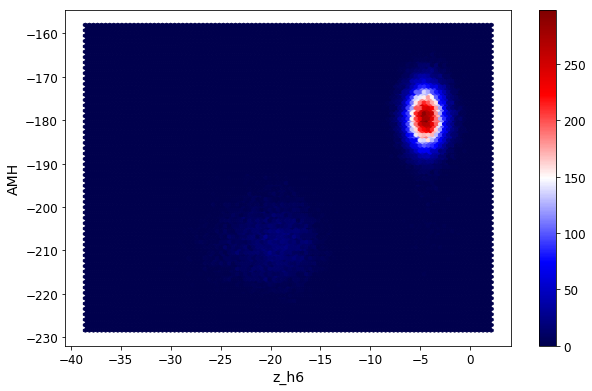

In [41]:
t = rerun5.query("Temp == 335 and Qw < 0.5 and Qw > 0.3")
t.plot.hexbin("z_h6", "AMH", cmap="seismic", sharex=False)

In [29]:
t.columns

Index(['Step', 'Run', 'Temp', 'Qw', 'Energy', 'DisReal', 'Dis_h56',
       'z_average', 'abs_z_average', 'z_h1', 'z_h2', 'z_h3', 'z_h4', 'z_h5',
       'z_h6', 'AMH', 'Distance', 'AMH-Go', 'Membrane', 'Rg', 'rg1', 'rg2',
       'rg3', 'rg4', 'rg5', 'rg6', 'rg_all', 'Lipid', 'Lipid1', 'Lipid2',
       'Lipid3', 'Lipid4', 'Lipid5', 'Lipid6', 'Lipid7', 'Lipid8', 'Lipid9',
       'Lipid10', 'Lipid11', 'Lipid12', 'Lipid13', 'Lipid14', 'Lipid15',
       'TotalE', 'BiasTo'],
      dtype='object')

In [39]:
t.query("z_h6 < -10").mean() - t.query("z_h6 > -10").mean()

Step            -223392.612380
Run                   0.464941
Temp                  0.000000
Qw                    0.028944
Energy                8.607668
DisReal               2.983515
Dis_h56              37.559262
z_average            -4.282559
abs_z_average         1.793494
z_h1                 -1.001620
z_h2                  0.840928
z_h3                 -1.276398
z_h4                 -0.557522
z_h5                 -8.476437
z_h6                -15.686500
AMH                 -28.557913
Distance             -1.928730
AMH-Go                5.685854
Membrane              3.166002
Rg                   -0.794932
rg1                  -0.216657
rg2                  -0.485125
rg3                   1.054752
rg4                  -0.601068
rg5                   0.524981
rg6                  -1.071815
rg_all               -0.794932
Lipid                 6.167467
Lipid1               -1.584031
Lipid2               -0.214806
Lipid3                0.587414
Lipid4                0.161079
Lipid5  

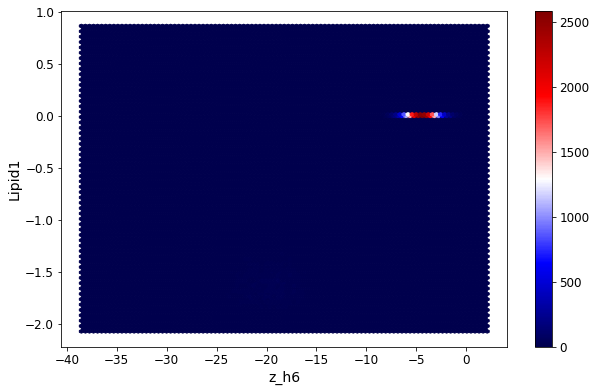

In [37]:
t.plot.hexbin("z_h6", "Lipid1", cmap="seismic", sharex=False)

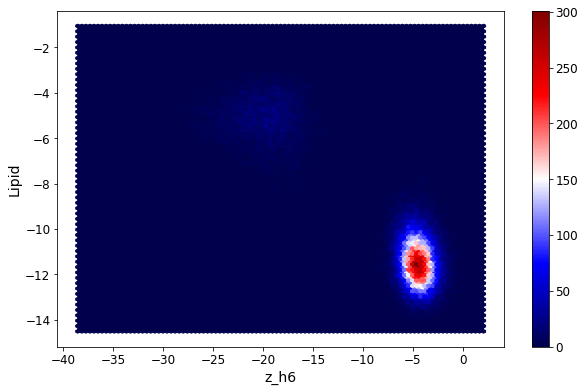

In [35]:
t.plot.hexbin("z_h6", "Lipid", cmap="seismic", sharex=False)

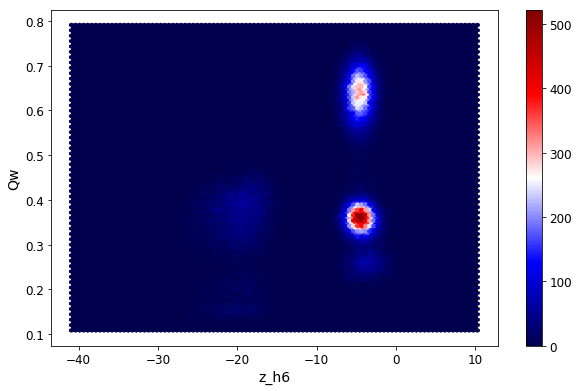

In [7]:
rerun3.query("Temp == 335").plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

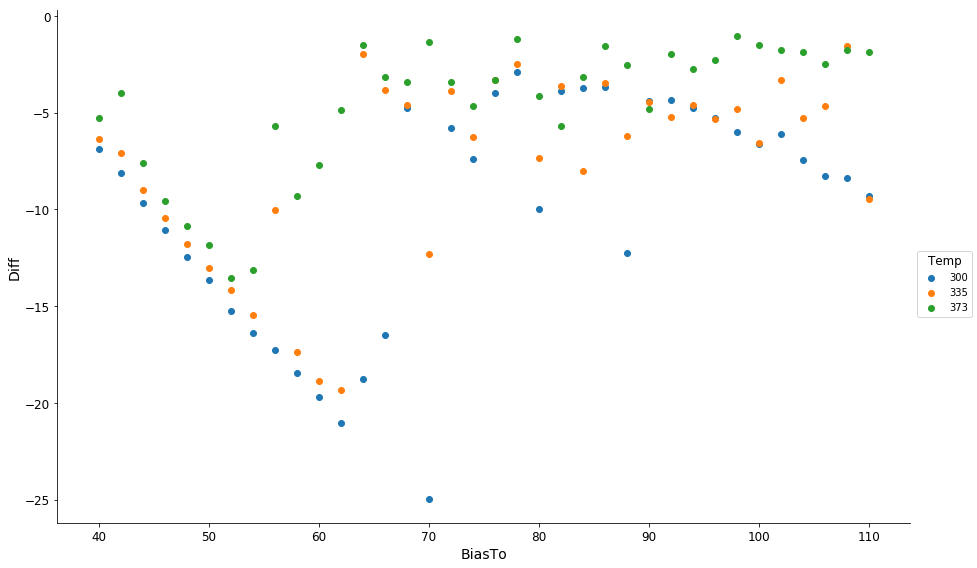

In [2]:
data = pd.read_feather("/Users/weilu/Research/server/may_2018/second_start_topology/rerun_1_11_May_133146.feather")
dic = {"T0":300, "T1":335, "T2":373, "T3":417, "T4":465, "T5":519, "T6":579, "T7":645, "T8":720, "T9":803, "T10":896, "T11":1000}
a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
rerun1 = data
t = a.query("Temp < 400").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

In [9]:
rerun5.columns

Index(['Step', 'Run', 'Temp', 'Qw', 'Energy', 'DisReal', 'Dis_h56',
       'z_average', 'abs_z_average', 'z_h1', 'z_h2', 'z_h3', 'z_h4', 'z_h5',
       'z_h6', 'AMH', 'Distance', 'AMH-Go', 'Membrane', 'Rg', 'rg1', 'rg2',
       'rg3', 'rg4', 'rg5', 'rg6', 'rg_all', 'Lipid', 'Lipid1', 'Lipid2',
       'Lipid3', 'Lipid4', 'Lipid5', 'Lipid6', 'Lipid7', 'Lipid8', 'Lipid9',
       'Lipid10', 'Lipid11', 'Lipid12', 'Lipid13', 'Lipid14', 'Lipid15',
       'TotalE', 'BiasTo'],
      dtype='object')

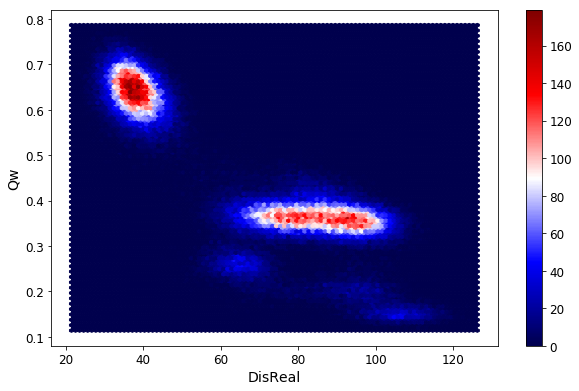

In [10]:
rerun5.query("Temp == 335").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

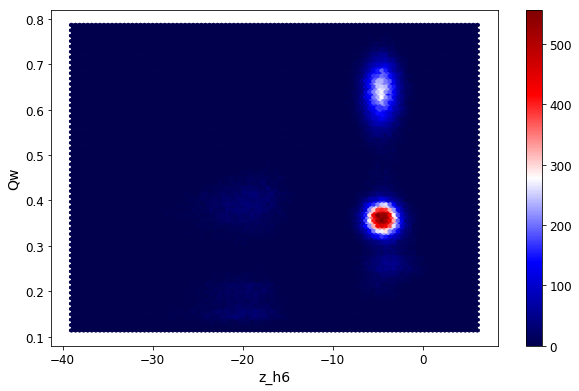

In [14]:
rerun5.query("Temp == 335").plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

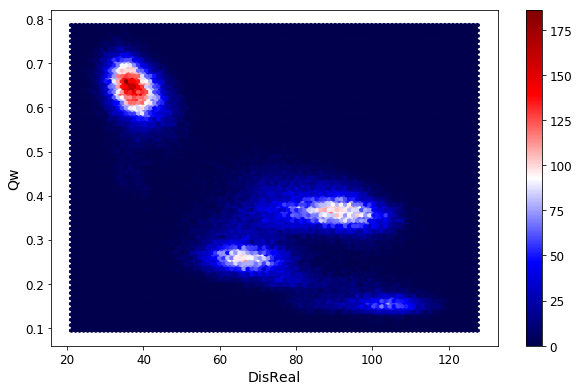

In [3]:
rerun1.query("Temp == 335").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

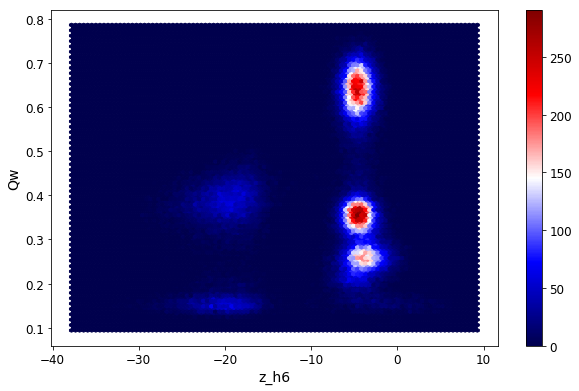

In [4]:
rerun1.query("Temp == 335").plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)